In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def make_data():
    T = 260
    t0 = 123
    dX = np.random.normal(0, 0.015, T)
    dX[t0:] += np.random.normal(0, 0.05, T - t0)
    dX[t0:] += 3e-3
    return np.exp(2.4 + np.cumsum(dX))

## Question:

$X$ contains a year of daily stock prices for a certain company. You know that sometime around the middle of the year, something changed inside the company, possibly affecting the price of the stock.
* Are the stock prices different before and after the change? Your answer should work without specifically deciding when the change occurred.
* Assuming the stock prices are different, are they lower or higher? By how much? Is there a change in trend?

## Answer

A plot of the data shows that there does seem to be a difference:

(0.0, 17.693091920771604)

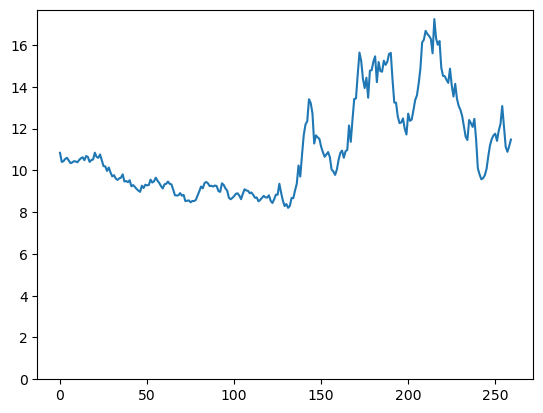

In [10]:
plt.plot(X := make_data())
plt.ylim((0, None))

One way to quantify this, without finding the change, is with weighted means and standard deviations:

In [11]:
T = len(X)
w_start = np.zeros(T)
t0 = 100
t1 = 150
w_start[:t0] = 1
w_start[t0:t1] = np.linspace(1, 0, t1-t0)
w_end = 1 - w_start

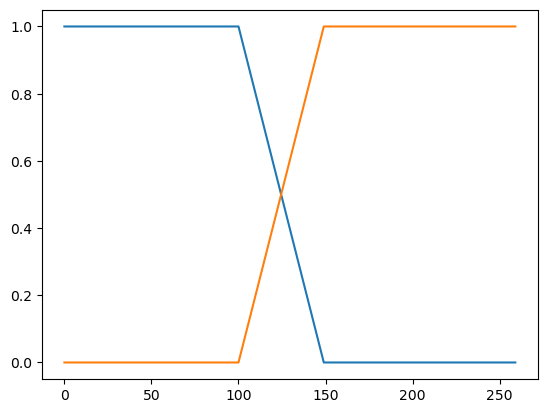

In [12]:
plt.plot(w_start)
plt.plot(w_end)

In [13]:
mean_start = np.sum(w_start * X) / np.sum(w_start)
mean_end = np.sum(w_end * X) / np.sum(w_end)

In [14]:
mean_start, mean_end

(9.438929853924886, 12.450096682313639)

In [15]:
var_start = np.sum(w_start * (X - mean_start)**2) / np.sum(w_start)
var_end = np.sum(w_end * (X - mean_end)**2) / np.sum(w_end)

In [16]:
var_start, var_end

(0.5302012773695053, 4.982774510249886)

The starting and ending parts of the series have substantially different mean and variance. The mean after the change is higher.

You can measure the change in trend by looking at statistics of the time derivative, $X[i] - X[i-1]$. The histogram below shows that the prices became more volatile after the change, but also perhaps acquired an upward trend.

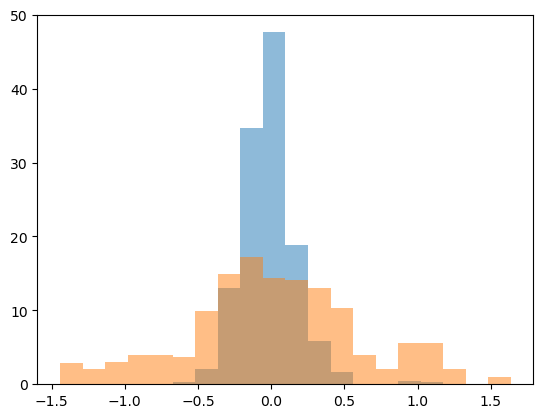

In [17]:
_ = plt.hist(np.diff(X), weights=w_start[:-1], bins=20, alpha=0.5)
_ = plt.hist(np.diff(X), weights=w_end[:-1], bins=20, alpha=0.5)

Quantify the volatility and trend the same as before:

In [18]:
dX = np.concatenate(([0], np.diff(X)))
mean_diff_start = np.sum(w_start * dX) / np.sum(w_start)
mean_diff_end = np.sum(w_end * dX) / np.sum(w_end)

In [19]:
mean_diff_start, mean_diff_end

(-0.010857501240569008, 0.014756976118482703)

In [20]:
var_diff_start = np.sum(w_start * (dX - mean_diff_start)**2) / np.sum(w_start)
var_diff_end = np.sum(w_end * (dX - mean_diff_end)**2) / np.sum(w_end)

In [21]:
var_diff_start, var_diff_end

(0.03370823768392421, 0.3501711082665038)